In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Task 1: Dataset Exploration
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [3]:
# Task 2: Data Preprocessing
# No missing values in this dataset
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes.data)
diabetes_scaled = pd.DataFrame(scaled_features, columns=diabetes.feature_names)
diabetes_scaled['target'] = diabetes.target
diabetes_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


In [4]:
# Task 3: Applying Linear Regression
# Applying Linear Regression to a Single Feature of your choice (e.g., BMI)
selected_feature = 'bmi'
X_single = diabetes_scaled[[selected_feature]]
y = diabetes_scaled['target']
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

lr_single = LinearRegression()
lr_single.fit(X_train_single, y_train)

LinearRegression()

Coefficients:
   Feature  Coefficient
0     bmi    47.497497


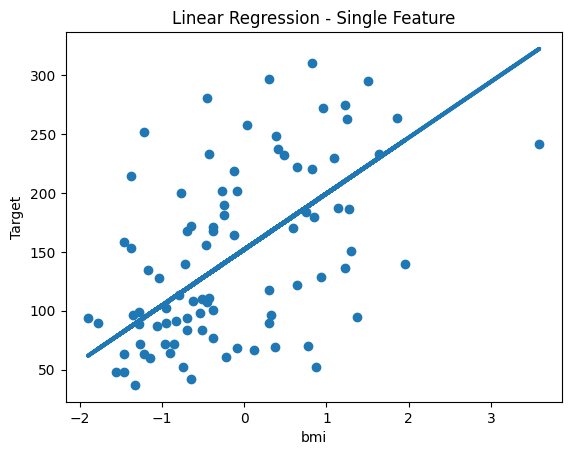

In [5]:
# Task 4: Interpretation of Results
coefficients = pd.DataFrame({'Feature': [selected_feature], 'Coefficient': [lr_single.coef_[0]]})
print("Coefficients:\n", coefficients)

# Visualize regression line
plt.scatter(X_test_single, y_test)
plt.plot(X_test_single, lr_single.predict(X_test_single), linewidth=3)
plt.xlabel(selected_feature)
plt.ylabel('Target')
plt.title('Linear Regression - Single Feature')
plt.show()



In [6]:
# Task 5: Evaluation of Model Performance
y_pred_single = lr_single.predict(X_test_single)
mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print("Mean Squared Error (BMI):", mse_single)
print("R-squared (BMI):", r2_single)

Mean Squared Error (BMI): 4061.8259284949263
R-squared (BMI): 0.2333503981587215


An R-squared value of 0.233 indicates that approximately 23.3% of the variance in the target variable (disease progression) is explained by the linear relationship with the selected feature (BMI).

Interpreting this result means that the model, which uses only the BMI feature to predict disease progression, captures around 23.3% of the total variation in disease progression among the individuals in the dataset.

In other words, while BMI alone provides some explanatory power for predicting disease progression, there are other factors not accounted for by this model that contribute to the remaining variance in the target variable. Therefore, the model might not be sufficiently robust for accurate predictions based solely on BMI, and incorporating additional features may improve its performance.

In [7]:
X = diabetes_scaled.drop('target', axis=1)
y = diabetes_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Task 4: Interpretation of Results
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print("Coefficients:\n", coefficients)

# Task 5: Evaluation of Model Performance
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients:
   Feature  Coefficient
0     age     1.802910
1     sex   -11.509071
2     bmi    25.800705
3      bp    16.538585
4      s1   -44.306406
5      s2    24.641710
6      s3     7.773096
7      s4    13.095537
8      s5    35.017409
9      s6     2.315027
Mean Squared Error: 2900.1936284934827
R-squared: 0.45260276297191926
